<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_016_hypothesis_testing_penguins_bill_length.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Penguin Bill Length Analysis Notebook Summary**

---

This notebook explores statistical differences in penguin bill lengths based on sex, using both **two-tailed** and **one-tailed tests**. The goal is to demonstrate hypothesis testing workflows, including variance checks, t-tests, and visualizations, to assess the relationship between male and female bill lengths.

---

#### **Key Steps and Analysis**
1. **Exploratory Data Analysis (EDA)**:
   - Visualized the distribution of **bill lengths** grouped by sex using boxplots to identify differences in central tendency and variability.

2. **Two-Tailed T-Test**:
   - Tested whether male and female penguins have significantly different bill lengths without assuming a direction of difference.
   - **Result**: Significant differences were observed (\(p < 0.05\)).

3. **One-Tailed T-Test**:
   - Specifically tested whether **male bill lengths are larger** than female bill lengths, based on biological expectations.
   - **Result**: Male bill lengths were found to be significantly larger (\(p < 0.05\)).

4. **Variance Assumption Check**:
   - Used Levene's test to assess the equality of variances between groups, confirming that variances are approximately equal (\(p > 0.05\)).
   - Chose the **standard two-sample t-test** based on this result.

5. **Visualization of Results**:
   - Created KDE plots for male and female bill lengths to visualize the distribution overlap and compare group means.
   - Plotted critical regions for one-tailed and two-tailed tests to illustrate the relationship between \(\alpha\), sensitivity, and critical thresholds.

---

#### **Key Takeaways**
1. **Statistical Significance**:
   - Both two-tailed and one-tailed tests confirmed significant differences in bill lengths between sexes.
2. **One-Tailed vs. Two-Tailed Tests**:
   - The one-tailed test provided more statistical power for detecting differences in the hypothesized direction.
3. **Visual Insights**:
   - Boxplots and KDE plots highlighted the separation in distributions and mean differences between groups.
4. **Guidance for Practice**:
   - Emphasized the importance of pre-specifying hypotheses and choosing one-tailed or two-tailed tests based on research goals.




### **Step 1: Load and Explore the Dataset**

In [15]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Penguins dataset
penguins = sns.load_dataset("penguins").dropna()

# Convert object columns to categorical
categorical_columns = ['species', 'island', 'sex']
penguins[categorical_columns] = penguins[categorical_columns].astype('category')

# Verify the changes
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.4 KB


#### Categorical Distribution Visualization

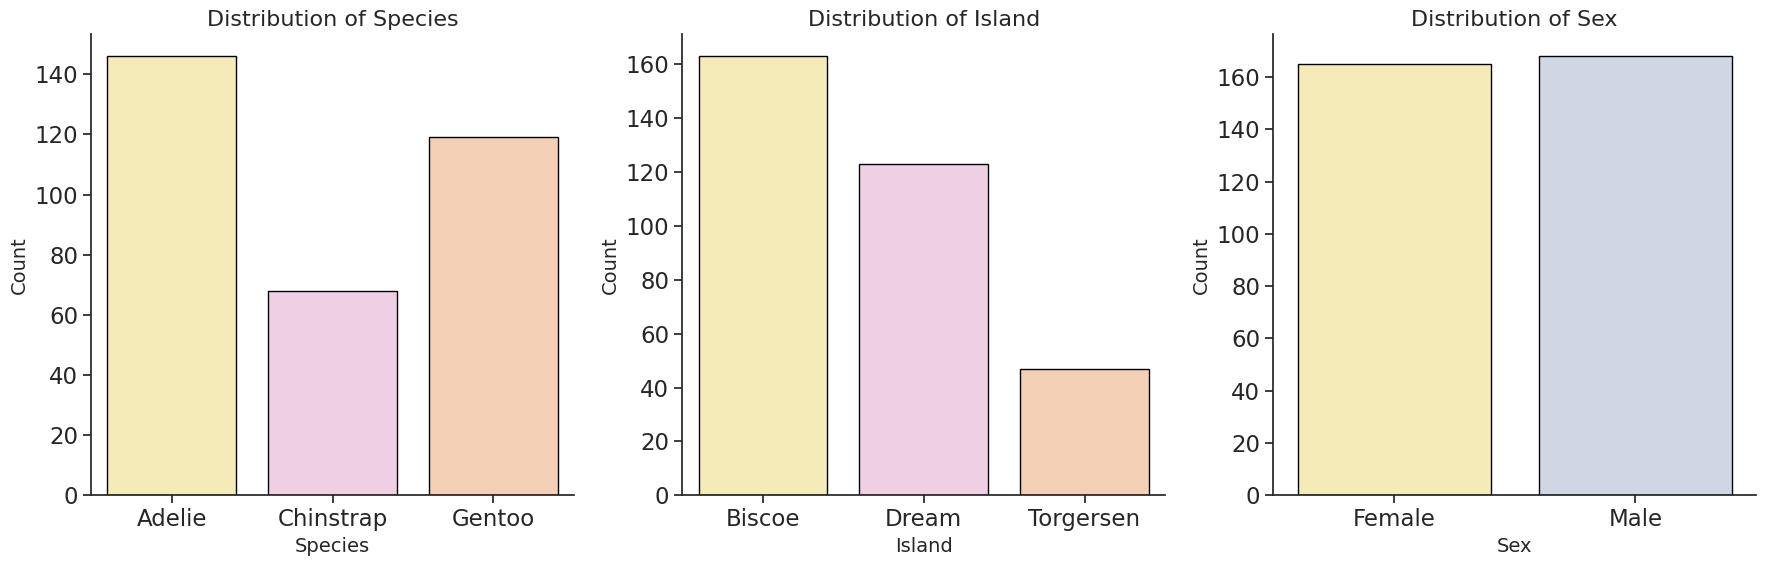

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme, style, and palette
theme_style = "ticks"
palette_name = "Pastel2_r"
context_scale = "notebook"

sns.set_theme(style=theme_style, palette=palette_name)
sns.set_context(context_scale, font_scale=1.5, rc={"lines.linewidth": 2.5})

# Define categorical columns
categorical_columns = ['species', 'island', 'sex']

# Create a 1x3 grid of barplots
plt.figure(figsize=(18, 6))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=penguins, x=column, hue=column, palette=palette_name, edgecolor="black")
    plt.title(f"Distribution of {column.capitalize()}", fontsize=16)
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.ylabel("Count", fontsize=14)
    sns.despine()

plt.tight_layout()
plt.show()



#### Numeric Distribution Visualization

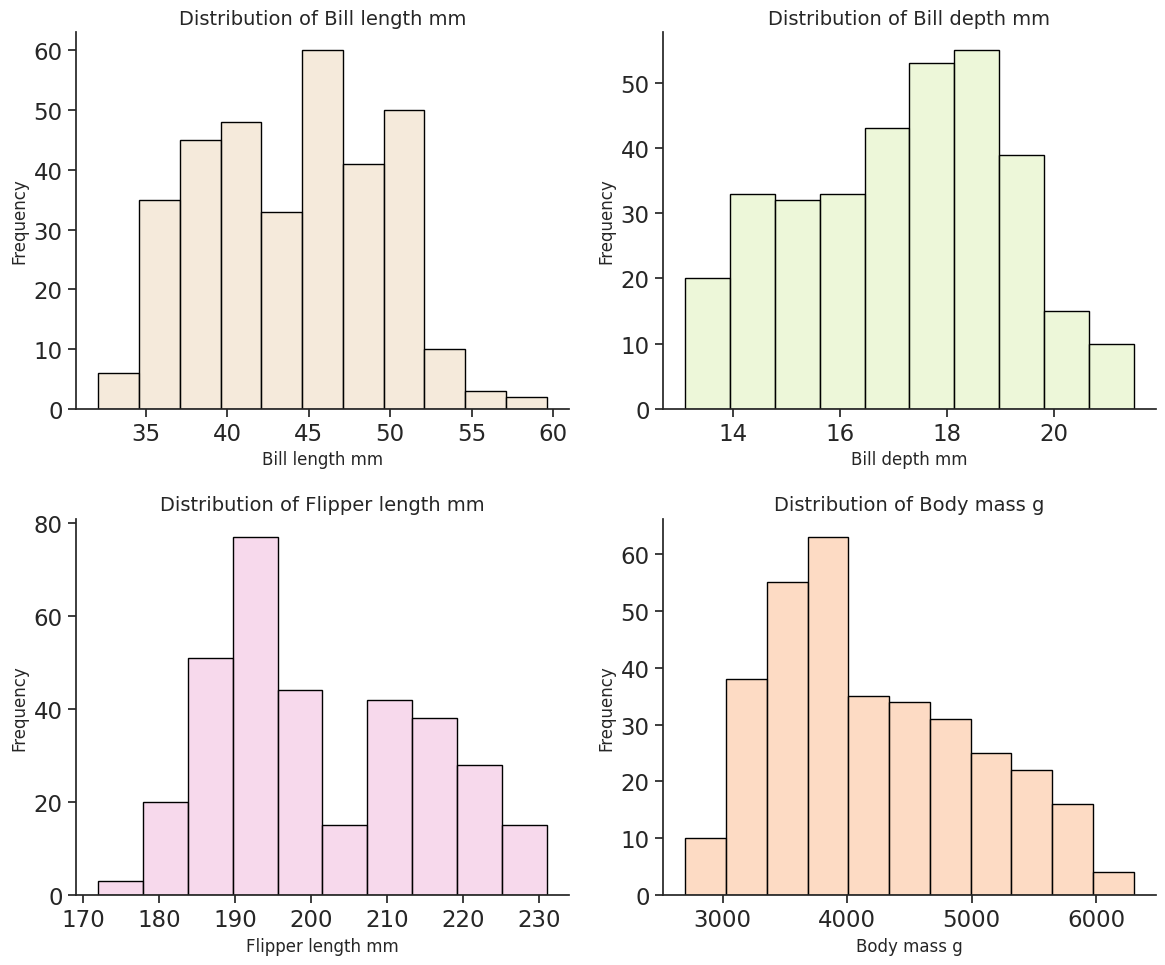

In [23]:
# Numeric columns in the dataset
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Plot overall distributions for each numeric feature
plt.figure(figsize=(12, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(
        data=penguins,
        x=column,
        kde=False,  # Add KDE to show the density
        color=sns.color_palette(palette_name, n_colors=4)[i - 1],
        edgecolor="black",
        alpha=0.7
    )
    plt.title(f"Distribution of {column.replace('_', ' ').capitalize()}", fontsize=14)
    plt.xlabel(column.replace('_', ' ').capitalize(), fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    sns.despine()

plt.tight_layout()
plt.show()


### **Step 2: Identify Possible Research Questions**
Based on the dataset's structure, we’ll explore comparisons such as:
1. **Flipper Length by Species**:
   - Do the mean flipper lengths differ significantly between the three species?
2. **Body Mass by Island**:
   - Do the mean body masses differ significantly across islands?
3. **Bill Length by Sex**:
   - Does the mean bill length differ significantly between male and female penguins?


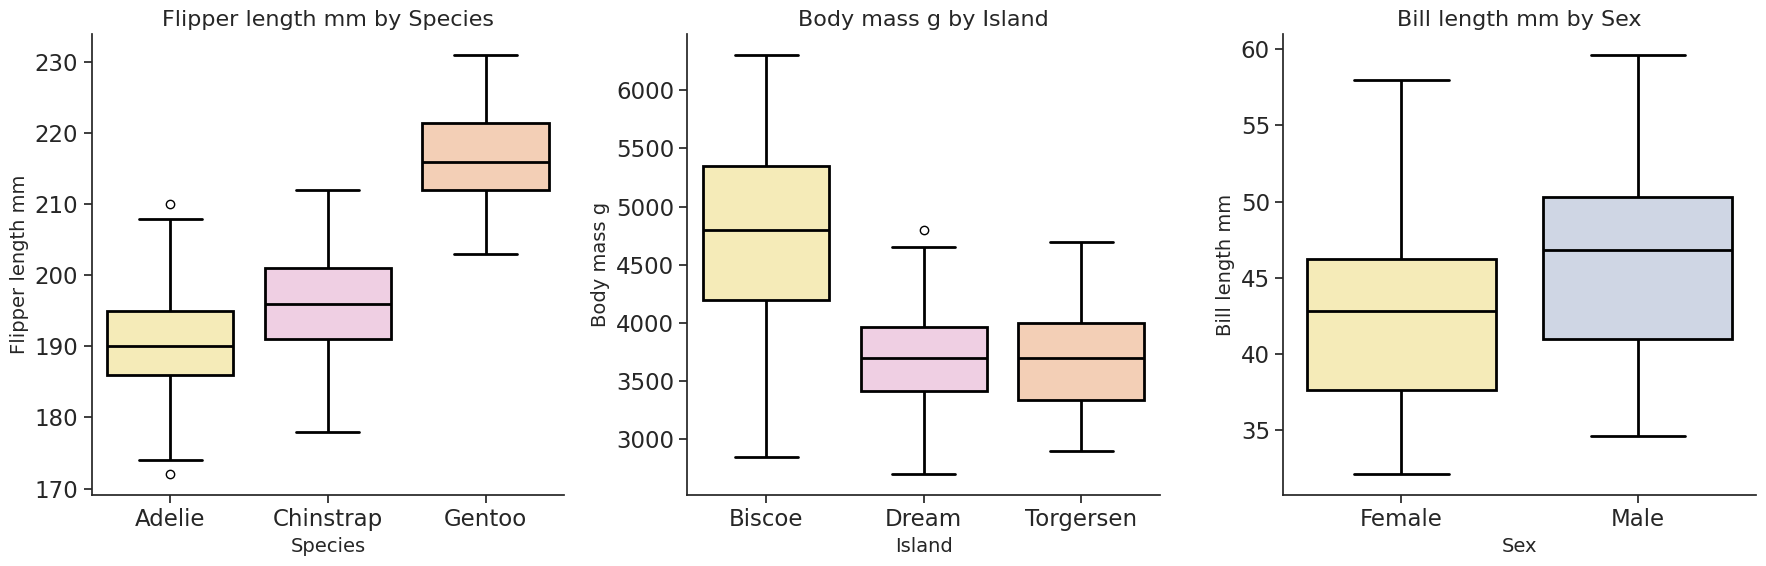

In [27]:
# Numeric-Categorical pairs for visualization
visualizations = [
    ('flipper_length_mm', 'species'),
    ('body_mass_g', 'island'),
    ('bill_length_mm', 'sex')
]

# Create a 1x3 grid of boxplots
plt.figure(figsize=(18, 6))

for i, (numeric, categorical) in enumerate(visualizations, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(
        data=penguins,
        x=categorical,
        y=numeric,
        hue=categorical,
        palette=palette_name,
        linecolor="k", linewidth=2,
        showfliers=True,  # Display outliers for additional insights
    )
    plt.title(f"{numeric.replace('_', ' ').capitalize()} by {categorical.capitalize()}", fontsize=16)
    plt.xlabel(categorical.capitalize(), fontsize=14)
    plt.ylabel(numeric.replace('_', ' ').capitalize(), fontsize=14)
    sns.despine()

plt.tight_layout()
plt.show()


## **Formulating the Hypotheses**

#### **Question**:
Do male and female penguins have significantly different mean bill lengths?

#### **Hypotheses**:
- **Null Hypothesis (\(H_0\))**: The mean bill lengths of male and female penguins are equal.
- **Alternative Hypothesis (\(H_1\))**: The mean bill lengths of male and female penguins are not equal.

---

### **Determine the Appropriate Test**

Since we are comparing **two independent groups** (male and female penguins), the appropriate tests depend on variance equality:
1. **Variance Test**:
   - Use Levene's test to check if the variances are equal.
2. **Mean Test**:
   - **Equal Variances**: Use a standard two-sample t-test.
   - **Unequal Variances**: Use Welch’s t-test.

---

### **Next Steps**
1. **Run the code** and return the results.
2. Based on the outcome, we’ll interpret the results and document the findings.

In [28]:
from scipy.stats import ttest_ind, levene

# Extract bill length data for male and female penguins
male_bill_length = penguins[penguins['sex'] == 'Male']['bill_length_mm']
female_bill_length = penguins[penguins['sex'] == 'Female']['bill_length_mm']

# Step 1: Test for variance equality using Levene's Test
stat_levene, p_levene = levene(male_bill_length, female_bill_length)

# Step 2: Choose the appropriate t-test based on variance equality
if p_levene > 0.05:
    t_stat, p_value = ttest_ind(male_bill_length, female_bill_length, equal_var=True)
    test_type = "Standard Two-Sample T-Test"
else:
    t_stat, p_value = ttest_ind(male_bill_length, female_bill_length, equal_var=False)
    test_type = "Welch's T-Test"

# Output results
print(f"{test_type} Results:")
print(f"Levene's Test P-Value: {p_levene:.4f}")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. The mean bill lengths differ significantly between males and females.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in mean bill lengths.")

Standard Two-Sample T-Test Results:
Levene's Test P-Value: 0.0938
T-Statistic: 6.67
P-Value: 0.0000
Conclusion: Reject the null hypothesis. The mean bill lengths differ significantly between males and females.


### **Summary Analysis of Two-Tailed Test Results**

---

#### **Question**
- Do male and female penguins have significantly different mean bill lengths?

---

#### **Results**

1. **Variance Equality**:
   - Levene’s Test (\(p = 0.0938\)) indicates that the variances between male and female bill lengths are approximately equal (\(p > 0.05\)).
   - Therefore, the standard two-sample t-test (assuming equal variances) is appropriate.

2. **T-Test**:
   - **T-Statistic**: \(6.67\) indicates a large difference between the means relative to the variability within each group.
   - **P-Value**: \(< 0.0001\) is far below the significance level (\(\alpha = 0.05\)).
   - **Conclusion**: The null hypothesis is rejected, meaning the mean bill lengths differ significantly between males and females.

3. **Practical Implication**:
   - The significant difference suggests that bill length can be used as a distinguishing feature between male and female penguins.

---

### **Interpretation of the Visualization**
1. **Shape of Distributions**:
   - The KDE curves will show how the distributions of bill lengths overlap or differ for males and females.

2. **Separation of Means**:
   - Vertical dashed lines at the group means will highlight the magnitude of the difference.

3. **Overlap**:
   - Areas of overlap between the two KDE curves indicate where bill lengths are similar for both sexes.


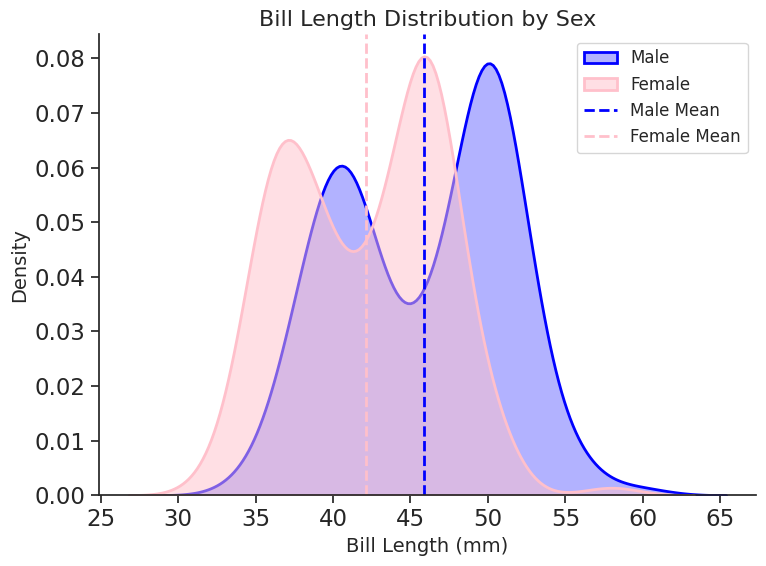

In [30]:
# KDE Plot for Male vs. Female Bill Lengths
plt.figure(figsize=(8, 6))

# KDE plots for each group
sns.kdeplot(male_bill_length, fill=True, alpha=0.3, linewidth=2, label="Male", color="blue")
sns.kdeplot(female_bill_length, fill=True, alpha=0.5, linewidth=2, label="Female", color="pink")

# Add vertical lines for group means
plt.axvline(x=male_bill_length.mean(), color="blue", linestyle="--", linewidth=2, label="Male Mean")
plt.axvline(x=female_bill_length.mean(), color="pink", linestyle="--", linewidth=2, label="Female Mean")

# Customize the plot
plt.title("Bill Length Distribution by Sex", fontsize=16)
plt.xlabel("Bill Length (mm)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12, loc="upper right")
sns.despine()
plt.tight_layout()
plt.show()

You can formulate the hypothesis as a **one-tailed test** instead of a two-tailed test. This would focus specifically on whether **male bill lengths are greater than female bill lengths**.

---

## **Formulating the One-Tailed Hypotheses**

#### **Question**:
Are male bill lengths significantly larger than female bill lengths?

#### **Hypotheses**:
- **Null Hypothesis (\(H_0\))**: The mean bill length of male penguins is **less than or equal to** that of female penguins.
- **Alternative Hypothesis (\(H_1\))**: The mean bill length of male penguins is **greater than** that of female penguins.


---

### **When to Use a One-Tailed Test**
- Use a one-tailed test when your hypothesis has a **specific directional expectation**:
  - Example: "Male penguins are expected to have larger bill lengths due to biological differences."
- A one-tailed test increases **statistical power** by focusing only on one direction of difference but risks missing effects in the opposite direction.




In [31]:
# Step 1: Perform a two-sample t-test (Welch's or standard based on variance test)
if p_levene > 0.05:
    t_stat, p_value_two_tailed = ttest_ind(male_bill_length, female_bill_length, equal_var=True)
    test_type = "One-Tailed Standard Two-Sample T-Test"
else:
    t_stat, p_value_two_tailed = ttest_ind(male_bill_length, female_bill_length, equal_var=False)
    test_type = "One-Tailed Welch's T-Test"

# Step 2: Adjust for one-tailed p-value
if t_stat > 0:  # Check if the difference is in the expected direction
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)

# Output results
print(f"{test_type} Results (One-Tailed):")
print(f"Levene's Test P-Value: {p_levene:.4f}")
print(f"T-Statistic: {t_stat:.2f}")
print(f"One-Tailed P-Value: {p_value_one_tailed:.4f}")

# Interpretation
alpha = 0.05
if p_value_one_tailed <= alpha:
    print("Conclusion: Reject the null hypothesis. Male bill lengths are significantly larger than female bill lengths.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant evidence that male bill lengths are larger.")

One-Tailed Standard Two-Sample T-Test Results (One-Tailed):
Levene's Test P-Value: 0.0938
T-Statistic: 6.67
One-Tailed P-Value: 0.0000
Conclusion: Reject the null hypothesis. Male bill lengths are significantly larger than female bill lengths.


### **Summary Analysis of One-Tailed Test Results**

---

#### **Question**
- Are male penguins’ bill lengths significantly larger than those of female penguins?

---

#### **Results**

1. **Variance Equality**:
   - Levene’s Test (\(p = 0.0938\)) indicates that the variances between male and female bill lengths are approximately equal (\(p > 0.05\)).
   - Therefore, a standard one-tailed t-test (assuming equal variances) is appropriate.

2. **T-Test**:
   - **T-Statistic**: \(6.67\) is a strong positive value, supporting the alternative hypothesis that male bill lengths are larger.
   - **One-Tailed P-Value**: \(< 0.0001\) is far below the significance level (\(\alpha = 0.05\)).
   - **Conclusion**: The null hypothesis (\(H_0\): Male bill lengths are less than or equal to female bill lengths) is rejected. There is strong evidence to support the claim that **male bill lengths are significantly larger than female bill lengths**.

3. **Practical Implication**:
   - The result aligns with the directional expectation, showing that male penguins generally have longer bills than female penguins. This could be biologically meaningful, potentially related to sexual dimorphism in the species.

---

### **Comparison with Two-Tailed Test**
- The **two-tailed test** confirmed that there is a significant difference in mean bill lengths between males and females without assuming a direction.
- The **one-tailed test** specifically tested and supported the directional hypothesis (\( \mu_{\text{male}} > \mu_{\text{female}} \)).

---

### **Summary of Findings**
Both tests provide statistically significant evidence that male and female penguins have different bill lengths, with the one-tailed test highlighting that **male bill lengths are larger**.


### One or Two Tailed Test?

The choice between a **one-tailed** and a **two-tailed test** depends entirely on the research question and the context of your study. Here's a breakdown to help clarify:

---

### **Two-Tailed Test**
- **When to Use**:
  - When you are testing for **any difference**, regardless of the direction.
  - Example: "Do male and female penguins have different bill lengths?" (no assumption about which is larger).
- **Hypotheses**:
  - **\(H_0\)**: The means are equal
  - **\(H_1\)**: The means are not equal
- **Advantages**:
  - More flexible since it accounts for differences in **both directions**.
  - Reduces bias from assuming a specific direction.
- **Disadvantages**:
  - Requires a stronger signal (larger test statistic) to detect significance compared to a one-tailed test.

---

### **One-Tailed Test**
- **When to Use**:
  - When you have a **specific directional hypothesis**.
  - Example: "Are male bill lengths significantly larger than female bill lengths?".
- **Hypotheses**:
  - **\(H_0\)**: The male bill length is less than or equal to the female bill length.
  - **\(H_1\)**: The male bill length is greater than the female bill length.
- **Advantages**:
  - Increased **statistical power** for detecting effects in one direction.
  - Lower \(p\)-value threshold in the hypothesized direction.
- **Disadvantages**:
  - Cannot detect differences in the opposite direction.
  - May introduce bias if the directional expectation is incorrect.

---

### **Key Considerations**
1. **Question**:
   - If you just want to know **if there is any difference** (larger or smaller), use a **two-tailed test**.
   - If you are **specifically testing a greater-than or less-than hypothesis**, use a **one-tailed test**.
   
2. **Study Context**:
   - If there is a **biological, theoretical, or practical basis** to expect a difference in one direction, a one-tailed test is justified.
   - If you have no strong directional expectation or the stakes are high (e.g., medical trials), a two-tailed test is safer.

3. **Transparency**:
   - Clearly specify your choice of a one-tailed or two-tailed test **before conducting the analysis** to avoid post hoc bias.



In statistical hypothesis testing, it’s generally **not advisable to perform a two-tailed test first and then follow it up with a one-tailed test on the same data**. Here’s why and what would be a sensible approach instead:

---

### **Why Not Do a Two-Tailed Test Followed by a One-Tailed Test?**
1. **Double-Dipping Problem**:
   - Running multiple tests on the same data increases the risk of **Type I errors** (false positives) because each test adds a chance of incorrectly rejecting the null hypothesis.

2. **Pre-Specified Hypotheses**:
   - Hypothesis testing relies on **defining your hypotheses beforehand**, so deciding to do a one-tailed test after seeing significant results in a two-tailed test introduces **post hoc bias**.

3. **Statistical Integrity**:
   - If you expect a directional effect (e.g., males have longer bills), you should start with a **one-tailed test**. Otherwise, a two-tailed test is more appropriate if you’re testing for any difference, regardless of direction.

---

### **Sensible Approach**
1. **Clarify the Research Question First**:
   - If the research is exploratory (e.g., you don’t know if males or females have longer bills), start with a **two-tailed test**.
   - If you have a clear directional hypothesis (e.g., males are expected to have longer bills), go directly to a **one-tailed test**.

2. **Use a Two-Tailed Test When Uncertain**:
   - If the two-tailed test reveals a significant difference, you can interpret that as evidence of a difference in means without bias.
   - If there’s **no significant difference**, the conclusion is simply that no strong evidence supports a difference, and there’s no need for further testing.

3. **Use a One-Tailed Test When Confident in Directionality**:
   - If prior knowledge or theory strongly supports a directional hypothesis, a one-tailed test is valid and more powerful for detecting the effect in the expected direction.

---

### **What to Do Instead of Testing Twice?**
1. **Choose Your Test Type Based on the Question**:
   - **Exploratory Question**: Use a two-tailed test.
   - **Specific Directional Hypothesis**: Use a one-tailed test from the start.

2. **Interpret the Results Carefully**:
   - A two-tailed test provides a broader understanding of whether there’s any difference at all.
   - A one-tailed test focuses on whether the effect aligns with your specific expectation.

3. **Run One Test and Report Findings Transparently**:
   - Avoid changing the test type after seeing the results. Stick to the original hypothesis you formulated.

---

### **Conclusion**
While starting with a two-tailed test seems unbiased, **switching to a one-tailed test afterward can introduce statistical bias and inflate error rates**. It’s better to:
1. Decide in advance whether the research question is directional or exploratory.
2. Run a single test based on the hypothesis you pre-specified.



### **Statistical Power and Why It Increases for One-Tailed Tests**

---

#### **What Is Statistical Power?**
**Statistical power** is the probability of correctly rejecting the null hypothesis (\(H_0\)) when it is actually false. It measures the ability of a test to detect a real effect or difference if one exists.

- **High Power**: More likely to detect a true effect (fewer false negatives, or Type II errors).
- **Low Power**: More likely to miss a true effect (more false negatives).

---

#### **Why Does Statistical Power Increase for One-Tailed Tests?**

In a **one-tailed test**, we focus exclusively on one direction of interest (e.g., \( \mu_{\text{male}} > \mu_{\text{female}} \)). This increases power because the significance level (\(\alpha\)) is concentrated entirely on one side of the distribution.

1. **Reallocation of \(\alpha\)**:
   - In a **two-tailed test**, the significance level (\(\alpha = 0.05\)) is split between both tails of the distribution (\(0.025\) in each tail).
   - In a **one-tailed test**, all \( \alpha \) is focused on a single tail (\(0.05\)), increasing the chance of detecting an effect in the expected direction.

2. **Reduced Critical Value**:
   - Because the entire \(\alpha\) is on one side, the **critical value** (the threshold for rejecting \(H_0\)) is smaller for a one-tailed test.
   - This makes it easier to reject the null hypothesis when the effect is in the expected direction.

3. **Directional Hypothesis**:
   - By assuming the effect is only in one direction, we eliminate the possibility of incorrectly considering effects in the opposite direction, which reduces the "noise" in the test.

---

#### **Illustration of Power in One- vs. Two-Tailed Tests**

1. **Two-Tailed Test**:
   - Critical regions are in both tails of the distribution.
   - Even if the true effect is strong but in the expected direction, part of the \(\alpha\) is "wasted" on the opposite tail.

2. **One-Tailed Test**:
   - Critical region is focused entirely in the expected direction.
   - Increases the likelihood of rejecting \(H_0\) if the true effect is in that direction.

---

#### **Trade-Offs of Increased Power in One-Tailed Tests**
1. **Strengths**:
   - More **sensitive** to detecting effects in the hypothesized direction.
   - Particularly useful when there is strong theoretical or practical justification for expecting a directional effect.

2. **Weaknesses**:
   - Cannot detect effects in the opposite direction.
   - Risk of **bias** if the directional hypothesis is not well-founded.

---

#### **When to Use a One-Tailed Test**
- Use a one-tailed test **only when**:
  - You have a clear, pre-specified expectation of the direction of the effect.
  - There is strong theoretical or practical support for this directional hypothesis.

---

In summary, statistical power increases in one-tailed tests because all the significance level is concentrated in the direction of interest, reducing the threshold for detecting an effect. However, this comes with the trade-off of not being able to detect effects in the opposite direction.



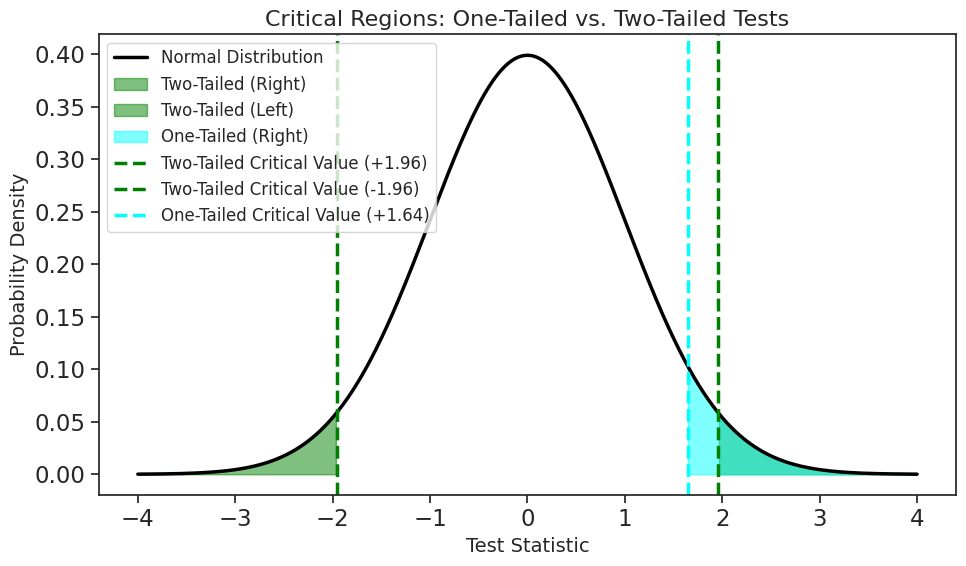

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the parameters for the normal distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)

# Define critical values for one-tailed and two-tailed tests
alpha = 0.05
critical_two_tailed = norm.ppf(1 - alpha / 2)
critical_one_tailed = norm.ppf(1 - alpha)

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Normal Distribution", color="k")

# Two-tailed critical regions
plt.fill_between(x, 0, y, where=(x >= critical_two_tailed), color="green", alpha=0.5, label="Two-Tailed (Right)")
plt.fill_between(x, 0, y, where=(x <= -critical_two_tailed), color="green", alpha=0.5, label="Two-Tailed (Left)")

# One-tailed critical region
plt.fill_between(x, 0, y, where=(x >= critical_one_tailed), color="cyan", alpha=0.5, label="One-Tailed (Right)")

# Add critical value lines
plt.axvline(critical_two_tailed, color="green", linestyle="--", label=f"Two-Tailed Critical Value (+{critical_two_tailed:.2f})")
plt.axvline(-critical_two_tailed, color="green", linestyle="--", label=f"Two-Tailed Critical Value (-{critical_two_tailed:.2f})")
plt.axvline(critical_one_tailed, color="cyan", linestyle="--", label=f"One-Tailed Critical Value (+{critical_one_tailed:.2f})")

# Customize the plot
plt.title("Critical Regions: One-Tailed vs. Two-Tailed Tests", fontsize=16)
plt.xlabel("Test Statistic", fontsize=14)
plt.ylabel("Probability Density", fontsize=14)
plt.legend(fontsize=12, loc="upper left")
plt.tight_layout()
plt.show()




### **How \(\alpha\) Affects Sensitivity**

1. **What \(\alpha\) Represents**:
   - \(\alpha\) is the probability of making a **Type I error** (rejecting the null hypothesis when it’s true).
   - Common values for \(\alpha\) are 0.05 or 0.01, representing a 5% or 1% chance of a Type I error.

2. **Two-Tailed vs. One-Tailed Tests**:
   - **Two-Tailed Test**:
     - Splits \(\alpha\) into **two regions** (\(\alpha/2\) in each tail), making the rejection thresholds more stringent for detecting effects in either direction.
   - **One-Tailed Test**:
     - Allocates **all of \(\alpha\)** to one tail, making it easier to detect differences in the hypothesized direction because the critical value (threshold for rejection) is closer to the center.

---

### **Sensitivity and \(\alpha\)**

#### **Larger \(\alpha\)**:
- If \(\alpha\) is **larger** (e.g., 0.1), the test becomes more **sensitive** to detecting differences because the critical value moves closer to the center of the distribution.
- **Impact**:
  - **Pro**: Easier to detect differences (increased sensitivity).
  - **Con**: Higher chance of **false positives** (Type I errors).

#### **Smaller \(\alpha\)**:
- If \(\alpha\) is **smaller** (e.g., 0.01), the test becomes **less sensitive** because the critical value moves farther from the center.
- **Impact**:
  - **Pro**: Reduces the likelihood of false positives.
  - **Con**: Higher chance of **false negatives** (Type II errors), meaning the test might fail to detect real differences.

---

### **Why Sensitivity Increases for One-Tailed Tests**

For a given \(\alpha\), the one-tailed test is **more sensitive** than a two-tailed test because:

1. **All of \(\alpha\) Is Focused on One Tail**:
   - In a one-tailed test with \(\alpha = 0.05\), the entire rejection region is on one side of the distribution.
   - For the same \(\alpha\), a two-tailed test splits \(\alpha\) (\(\alpha/2 = 0.025\) in each tail), requiring a stronger signal to reject the null hypothesis.

2. **Lower Critical Value in One-Tailed Test**:
   - The critical value (threshold) for rejecting \(H_0\) is closer to the mean in a one-tailed test compared to a two-tailed test.
   - This makes it easier to detect differences in the hypothesized direction.

---

### **Visualizing \(\alpha\)’s Impact**

Let’s revisit your scenario:

1. **One-Tailed Test (\(\alpha = 0.05\))**:
   - Rejection region is all on one side.
   - More likely to detect differences because the threshold is lower.
2. **Two-Tailed Test (\(\alpha = 0.05\))**:
   - Rejection regions are split between both tails.
   - Less likely to detect differences because the threshold is stricter.

